Vamos a hacer una predicción con el set de datos de Market Basket usando Apriori

**Importar Librerías ¿Cuáles?**  

- DataSets - Market Basket
- apriori 
    - from apyori import apriori



**Estructura del programa**

- Importo librerías
- Selecciono el dataset
- Preprocesamiento - Normalización - Limpieza
- Podemos visualizar un poco la data (Exploración de los Datos)
- Hago la predicción con el clasificador seleccionado

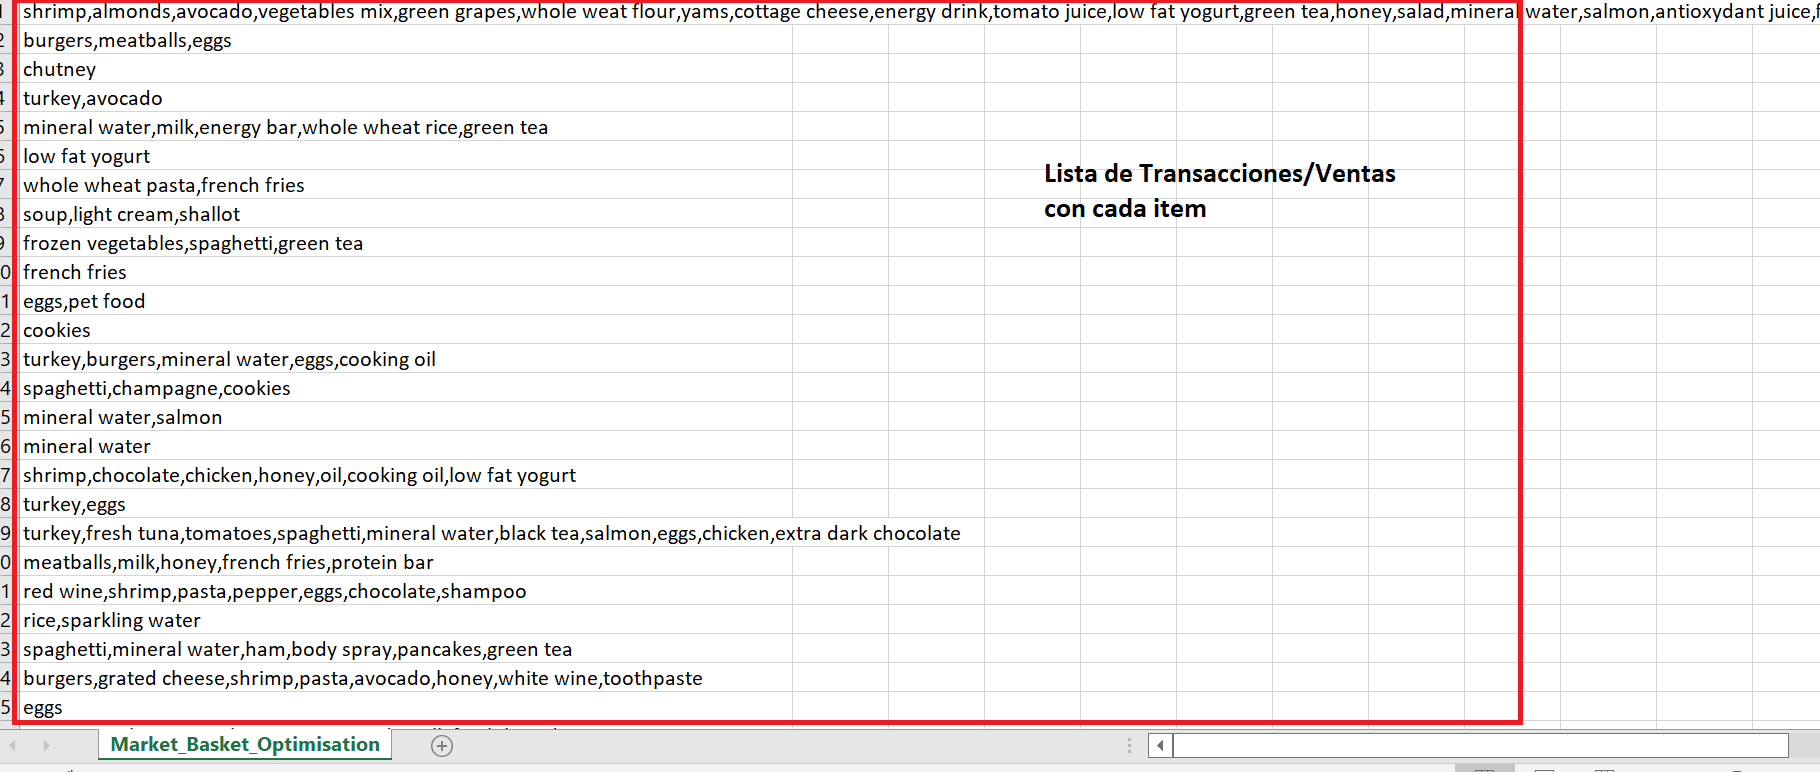

Cargamos las librerias necesarias

In [2]:
!pip install apriori 
!pip install apyori

import pandas as pd
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=e61ca093d93a98f1a3b7f954ed53bf375152d6c94f19d29b88ce9be64ae517f7
  Stored in directory: c:\users\m.pirela.escobar\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


Importamos el archivo de transacciones

In [3]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Recorro el dataset para asignarlo a transactions

In [4]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

Entrenamiento del Dataset con Apriori

In [5]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)


Evaluación de los Resultados

In [6]:
results = list(rules)
def inspect(results):
    lh          = [tuple(result[2][0][1]) for result in results] 
    rh 			= [tuple(result[2][0][0]) for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(rh, lh, supports, confidences, lifts))

Creamos un Dataframe para evaluar/ver los resultados


In [14]:
resultDataFrame=pd.DataFrame(inspect(results),
                columns=['lhs (left hand side) Ancedente','rhs (rignt hand side) Consecuente','support','confidence','lift'])

df_result = resultDataFrame.copy()

Imprimimo el dataframe con los resultados de lsa reglas

In [8]:
pd.set_option("max_rows", None)

In [20]:
resultDataFrame.head(160)

filtered_df = df_result[(df_result['support'] > 0.003) & (df_result['lift'] > 1)]

filtered_df.sort_values(['support'], ascending = False)


,lhs (left hand side) Ancedente,rhs (rignt hand side) Consecuente,support,confidence,lift
4,"(herb & pepper,)","(ground beef,)",0.015998,0.323450,3.291994
43,"(herb & pepper,)","(nan, ground beef)",0.015998,0.323450,3.291994
95,"(frozen vegetables, spaghetti)","(nan, ground beef)",0.008666,0.311005,3.165328
30,"(frozen vegetables, spaghetti)","(ground beef,)",0.008666,0.311005,3.165328
7,"(whole wheat pasta,)","(olive oil,)",0.007999,0.271493,4.122410
60,"(whole wheat pasta,)","(nan, olive oil)",0.007999,0.271493,4.130772
55,"(milk, spaghetti)","(olive oil,)",0.007199,0.203008,3.082509
102,"(shrimp, mineral water)","(frozen vegetables, nan)",0.007199,0.305085,3.200616
34,"(shrimp, mineral water)","(frozen vegetables,)",0.007199,0.305085,3.200616
128,"(milk, spaghetti)","(nan, olive oil)",0.007199,0.203008,3.088761


Observamos las reglas resultantes con 2, 3 o más artículos que implican otro grupo de
productos y tenemos también el soporte, confianza y el lift.

**Interpretación de los resultados**

Los resultados que se han obtenido dicen cosas interesantes. Analizando la primera regla
se puede observar que los clientes que han comprado crema light también aparece
pollo con un soporte de 0,045 y una confianza de 0,29. Esto indica que en el 4,5% de las 
transacciones contienen ambas referencias. Además, la confianza indica que en el 29% de
los casos que se compra crema light también aparece pollo.
La mejora de la confianza (lift) de 4,84 indica que cuando aparece crema light aparece la
otra referencia 4 veces más de lo que se podría esperar por azar.
Recordando una de las definiciones arriba decíamos que “Cuanto más se aleje el valor
de lift de 1, más evidencias de que la regla no se debe a un artefacto aleatorio, es decir,
mayor la evidencia de que la regla representa un patrón real.”